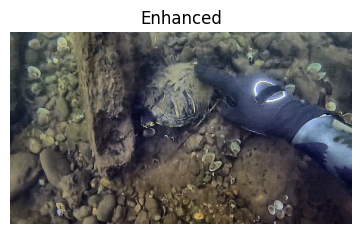

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('C:/College Projects/Applied LA for ML/5426a351-39e9-478c-8775-5fbcd69d30e5/raw/raw-890/15418.png')


def white_balance_gray_world(image):
    img_float = image.astype(np.float32)
    
    avg_gray = np.mean(img_float)

    channel_means = np.mean(img_float, axis=(0, 1))
    scale_b = avg_gray / channel_means[0]
    scale_g = avg_gray / channel_means[1] 
    scale_r = avg_gray / channel_means[2] 

    balanced_b = np.clip(img_float[:,:,0] * scale_b, 0, 255).astype(np.uint8)
    balanced_g = np.clip(img_float[:,:,1] * scale_g, 0, 255).astype(np.uint8)
    balanced_r = np.clip(img_float[:,:,2] * scale_r, 0, 255).astype(np.uint8)

    balanced_image = cv2.merge([balanced_b, balanced_g, balanced_r])
    
    return balanced_image

def enhance_image(image):
    # Convert to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Split the LAB image into channels
    l, a, b = cv2.split(lab_image)
    
    # Apply histogram equalization to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    
    # Merge the equalized L channel with the original A and B channels
    enhanced_lab = cv2.merge([l_eq, a, b])
    
    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
    
    # Apply sharpening
    kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    enhanced_image = cv2.filter2D(enhanced_image, -1, kernel_sharpening)
    
    return enhanced_image

# White balance
# balanced_image = white_balance_gray_world(image)

# Enhance the balanced image

gray_image=cv2.imread('C:/College Projects/Applied LA for ML/gray_world_image.png')
enhanced_image = enhance_image(gray_image)
cv2.imwrite('enhanced_image.png', enhanced_image)
# Display all images
plt.figure(figsize=(15, 5))

# Original image
# plt.subplot(1, 3, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Original')
# plt.axis('off')

# Balanced image
# plt.subplot(1, 3, 2)
# plt.imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
# plt.title('White Balanced')
# plt.axis('off')

# Enhanced image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced')
plt.axis('off')

plt.show()
